# About

## Funciones
- `check_interpolation(x_values, f, g, title)`: Grafica dos funciones en un intervalo dado. Se utilizará para comparar la función real y el polinomio interpolador.
- `lagrange(points)`: Define el polinomio interpolador mediante el **método de Lagrange** como una función. Para esto se implementa como una función de *orden superior*, es decir **se retorna una función**.

## Objetivo
- Mejorar la comprensión, **mediante la visualización**, del error al aproximar una función mediante una **interpolación polinomial**.

## Autor
- Diego Quezada.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def check_interpolation(x_values, f, g, title):
    y_values_f = f(x_values) # imagenes de f p.ara los valores x_values
    y_values_g = g(x_values) # imagenes de g para los valores x_values
    plt.plot(x_values, y_values_f, label='real') # plot f
    plt.plot(x_values, y_values_g, label='aprox') # plot g
    plt.legend(loc="upper left")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

In [5]:
def l(x, k, points):
    numerador = 1
    denominador = 1
    for i in range(len(points)):
        if (i != k):
            numerador = numerador * (x - points[i][0]) # *(x - x_i)
            denominador = denominador * (points[k][0] - points[i][0]) # *(x_k - x-i)
    
    return numerador/denominador
    
def lagrange(points): # función de orden superior
    
    def polinomio(x):
        suma = 0
        for i in range(len(points)):
            suma = suma + points[i][1] * l(x, i, points) # suma = suma + y * L_i
        
        return suma
    
    return polinomio # se retorna una función que depende de x

In [6]:
def runge(x):
    return 1/(1 + 25*(x**2)) # función con la que Runge descubrió el fenómeno de Runge

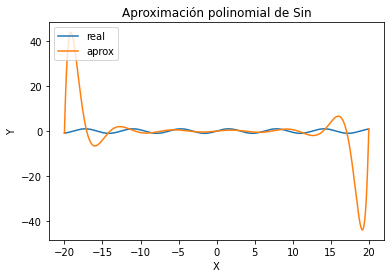

In [7]:
a, b = -20, 20 # intervalo a graficar

number_points = 100000 # números puntos a graficar
x_values = np.linspace(a,b,number_points) # valores de x equiespaciados para graficar

number_points_interpolation = 15  # numero de puntos para la interpolación
x_values_interpolation = np.linspace(a,b,number_points_interpolation) # valores de x equiespaciados para interpolar

points = [(x, np.sin(x)) for x in x_values_interpolation ] # puntos (x,y) para interpolar
polinomio = lagrange(points)

check_interpolation(x_values, np.sin, polinomio, title = "Aproximación polinomial de Sin")

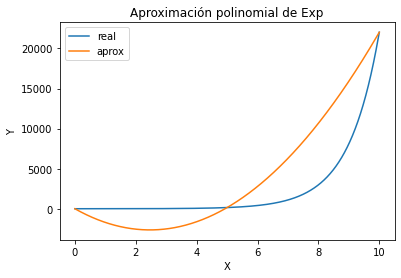

In [9]:
a, b = 0, 10 # intervalo a graficar

number_points = 10000 # números puntos a graficar
x_values = np.linspace(a,b,number_points) # valores de x equiespaciados para graficar

number_points_interpolation = 3  # numero de puntos para la interpolación
x_values_interpolation = np.linspace(a,b,number_points_interpolation) # valores de x equiespaciados para interpolar

points = [(x, np.exp(x)) for x in x_values_interpolation ] # puntos (x,y) para interpolar
polinomio = lagrange(points)

check_interpolation(x_values, np.exp, polinomio, title = "Aproximación polinomial de Exp")

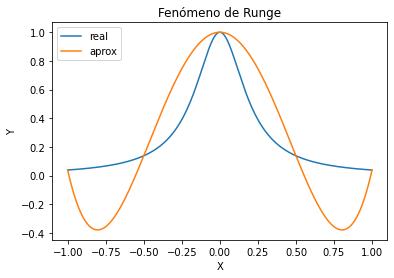

In [153]:
a, b = -1, 1 # intervalo a graficar

number_points = 10000 # números puntos a graficar
x_values = np.linspace(a,b,number_points) # valores de x equiespaciados para graficar

number_points_interpolation = 5  # numero de puntos para la interpolación
x_values_interpolation = np.linspace(a,b,number_points_interpolation) # valores de x equiespaciados para interpolar

points = [(x, runge(x)) for x in x_values_interpolation ] # puntos (x,y) para interpolar
polinomio = lagrange(points)

check_interpolation(x_values, runge, polinomio, title = "Fenómeno de Runge")